In [1]:
import json
import glob
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw



'''
Description:
    This code Helps you to draw lines on the image. PIL Image library is used to plot lines on the image
    with the help of lines and baselines values in the json. To use this code you must specify path of 
    the folder which includes a json file and an image.

'''

folder_name = "./samples/"
json_file   = glob.glob(f"{folder_name}*.json")[0]
image_path  = glob.glob(f"{folder_name}*.*g")[0]



# Reading Files

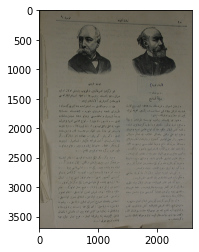

In [2]:
# Opening JSON file
with open(json_file, 'r') as openfile:
    # Reading from json file
    json_object = json.load(openfile)
    
    
image = Image.open(image_path)
plt.imshow(image)
plt.show()

In [13]:



 


def draw_lines(key, image):
    '''
    Description:
        Draw Lines on the Image.
    
    Input:
        key    (str)  : Flag line or baseline respectively
        image  (PIL)  : Image on which you want to draw lines
    
    Output:
        image (PIL Image) : PIL image with drawn lines
    
    '''
    global json_object
    
    draw = ImageDraw.Draw(image) 
    if key == 'baseline':
        lines = json_object['lines']
        for i in lines:
            baseline = tuple([j for num in i['baseline'] for j in num])
            draw.line(baseline, fill=128)
    
    elif key == 'line':
        lines = json_object['lines']
        for i in lines:
            
            boundry = i['boundary']
            boundry.append(boundry[-1])
            boundry.append(boundry[0])
            line = [num for line in boundry for num in line]
            draw.line(line, fill=128, width=9)
            
    return image





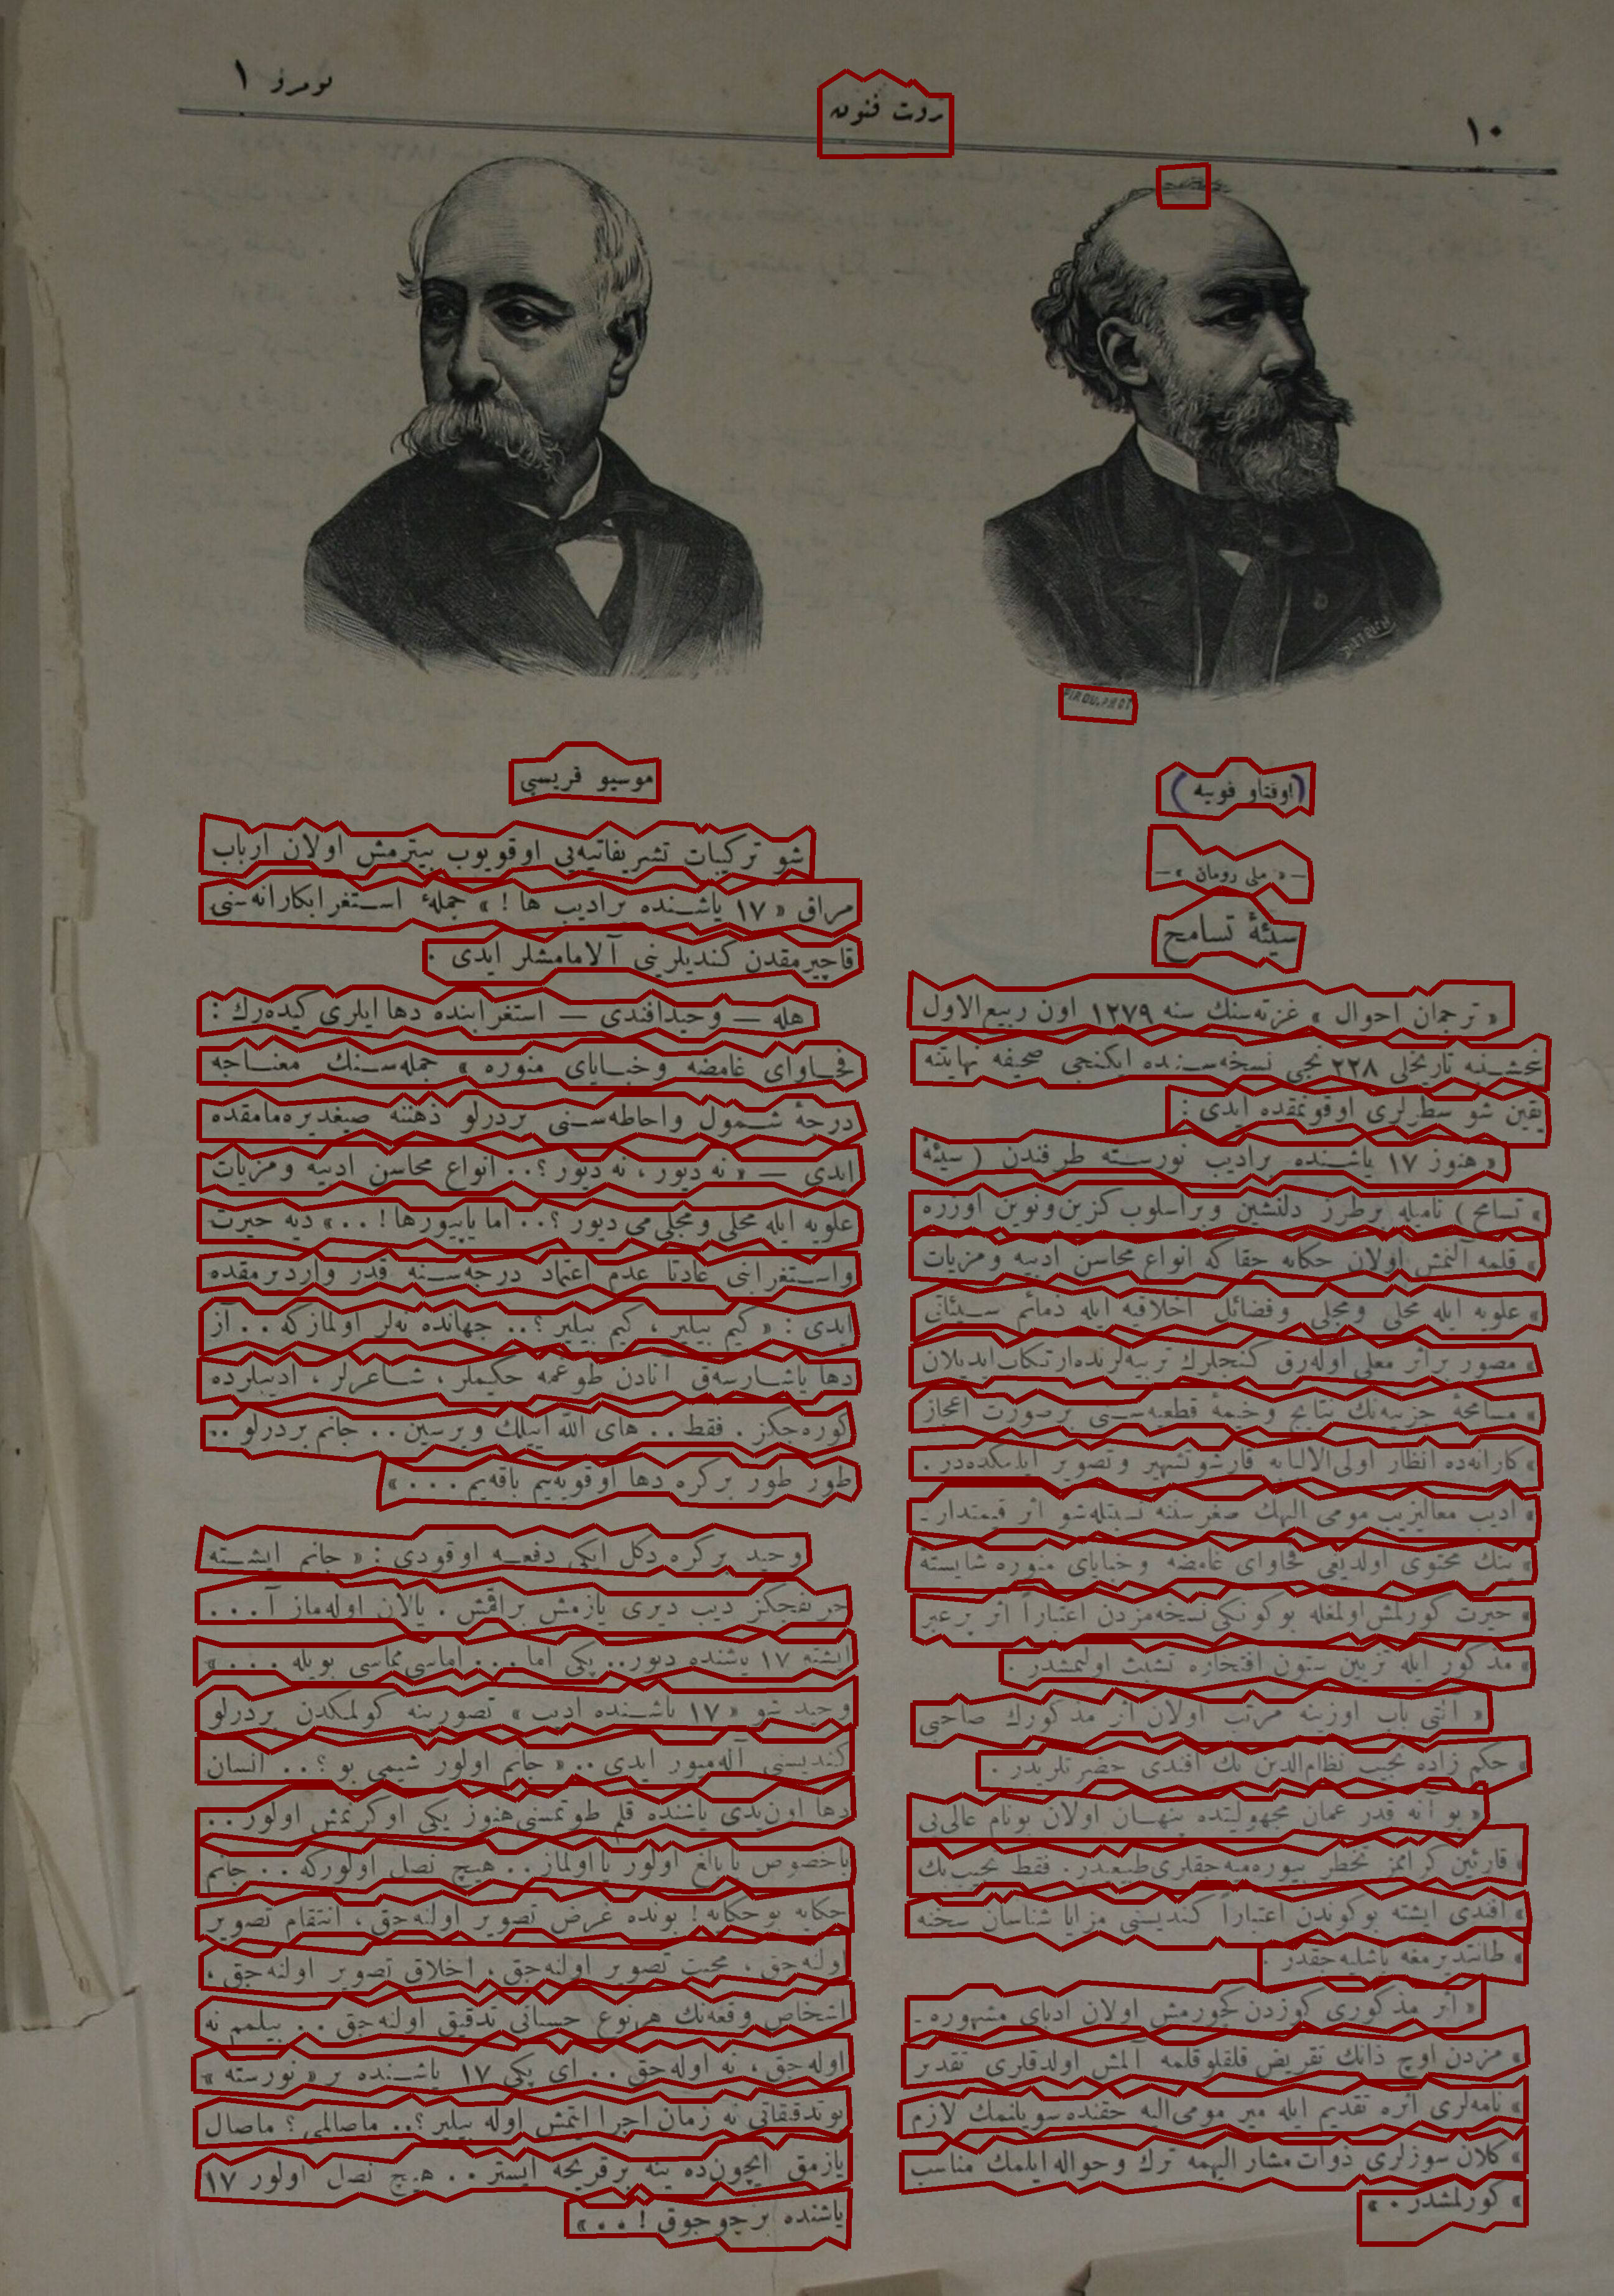

In [14]:
line  = (1318, 196, 1533, 196)
key   = 'line'
image = draw_lines(key, image)
image